# VGG16 architecture

<img src="Images/VGG16_Arch.png" 
        alt="Picture" 
        style="display: block; margin: 0 auto" />

This model was trained with ImageNet(dataset of 14million of images), so we will use a pre-trained model

In [5]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.python import keras
import matplotlib.pyplot as plt
import glob
import os
import json

#### Load Pretrained model

In [2]:
model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=True) #Include top: Only gives us the DNN weights part

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
with open('imagenet_labels.json') as f:
    data = json.load(f)

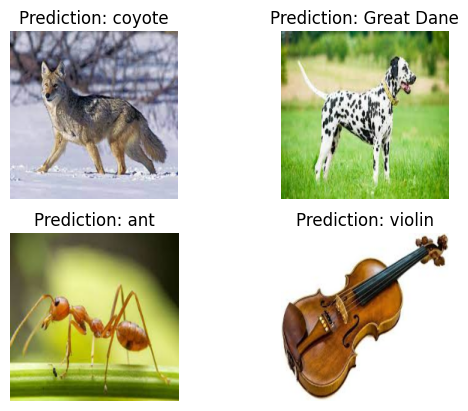

In [46]:
fig, axs = plt.subplots(2, 2)

i,j = 0,0

for path in os.listdir('Test/'):
    
    for filename in glob.glob('Test/'+path):
        img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(224,224))
            
        predict = model.predict(np.array([img]), verbose=0)
        predict = np.argmax(predict)
        
        axs[i][j].imshow(img)
        axs[i][j].set_title("Prediction: {}".format(data[predict]))
        axs[i][j].axis("off")
        
    j += 1

    if j == 2:
        j = 0
        i += 1
    

plt.show()